# Problem Statement:

### The objective is to analyze and preprocess a heart disease dataset to explore patterns and features,
### Enabling further predictive analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Observations:

Age & Gender: Individuals aged 37-63, primarily male.

Cholesterol & Blood Pressure: High cholesterol (204-354) and elevated blood pressure (120-145).

Heart Rate: Maximum heart rates range from 150 to 187.

Exercise & ECG: Minimal exercise-induced angina; varied ECG results.

Outcome: All individuals are marked as having heart disease (target = 1).

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 1. Data Cleaning
# Check for missing values

In [17]:
missing_values=data.isnull().sum()

In [19]:
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Insights

I identify there is no missing_values

In [23]:
data=data.dropna()

In [25]:
duplicates=data.duplicated().sum()

In [27]:
duplicates

1

In [29]:
if duplicates>0:
    data=data.drop_duplicates()

In [31]:
data.columns=[col.strip().lower().replace(' ','_')for col in data.columns]
              

In [33]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 2. Exploratory Data Analysis (EDA)


### Univariate Analysis

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


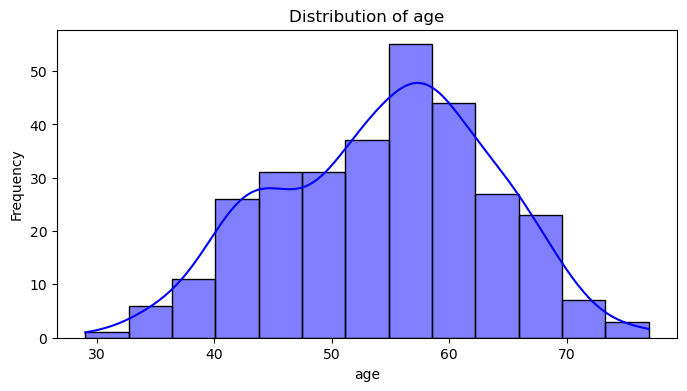

In [37]:
column = 'age'

plt.figure(figsize=(8, 4))
sns.histplot(data[column], kde=True, color="blue")
plt.title(f"Distribution of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.show()

# Insights for Age Distribution
The histogram shows the distribution of the age variable, including its frequency and overall shape. By observing the plot, you can quickly identify whether the data is normally distributed, skewed, or contains outliers.

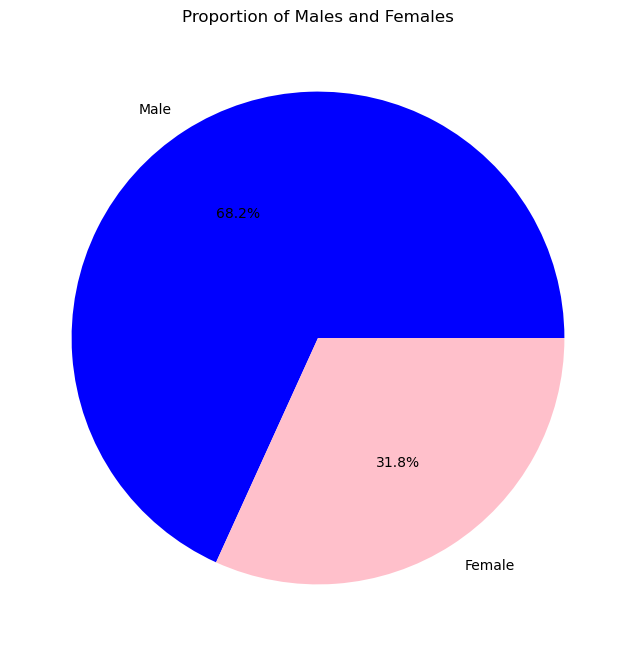

In [40]:
sex_counts =data['sex'].value_counts()
sex_labels = ['Male', 'Female']
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_labels, autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Proportion of Males and Females')
plt.show()

# insights:
The pie chart indicates that males make up 68.2% of the dataset, while females account for 31.8%, highlighting a significant gender imbalance.


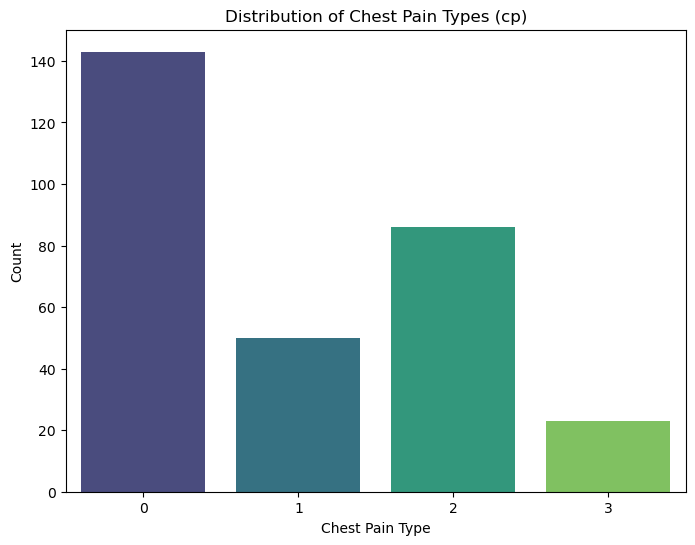

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', data=data, palette='viridis')
plt.title('Distribution of Chest Pain Types (cp)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# Insights
1.The cp column represents chest pain types with values ranging from 0 to 3.

2.Some chest pain types occur more frequently than others, indicating a possible relationship with heart disease prevalence.

3.The most common chest pain type can indicate the predominant symptom in the dataset's population.

4.A balanced or imbalanced distribution of cp could influence model performance in predicting target outcomes.

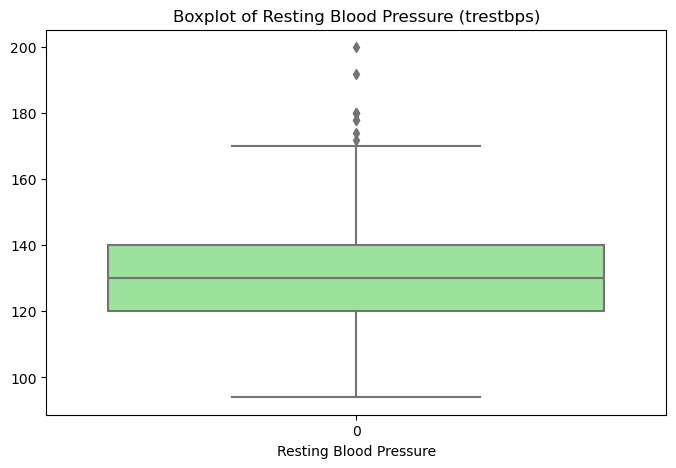

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(data['trestbps'], color='lightgreen')
plt.title('Boxplot of Resting Blood Pressure (trestbps)')
plt.xlabel('Resting Blood Pressure')
plt.show()

# Insights
The boxplot of Resting Blood Pressure (trestbps) shows the distribution of values, highlighting the median, quartiles, and potential outliers. The central line represents the median resting blood pressure, while the box indicates the interquartile range (IQR). Outliers, if any, are shown as individual points outside the whiskers. This plot helps to quickly assess the spread and identify extreme values in resting blood pressure among the dataset.


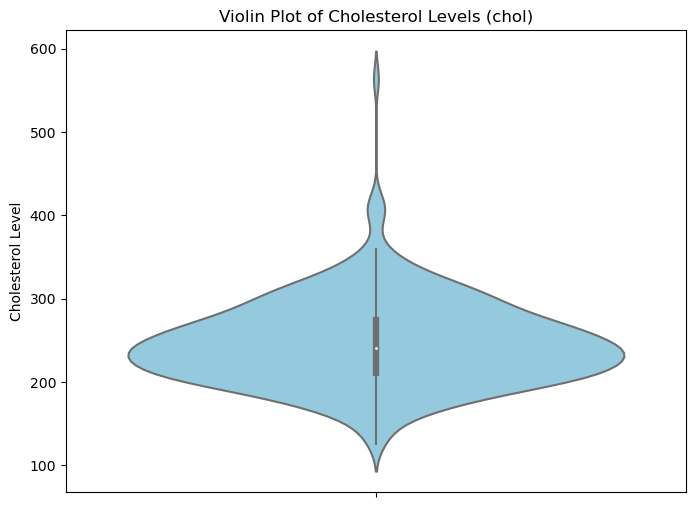

In [49]:
plt.figure(figsize=(8, 6))
sns.violinplot(y='chol', data=data, color='skyblue')
plt.title('Violin Plot of Cholesterol Levels (chol)')
plt.ylabel('Cholesterol Level')
plt.show()

# insights
The data is densely concentrated around the median, with some skewness towards higher values.

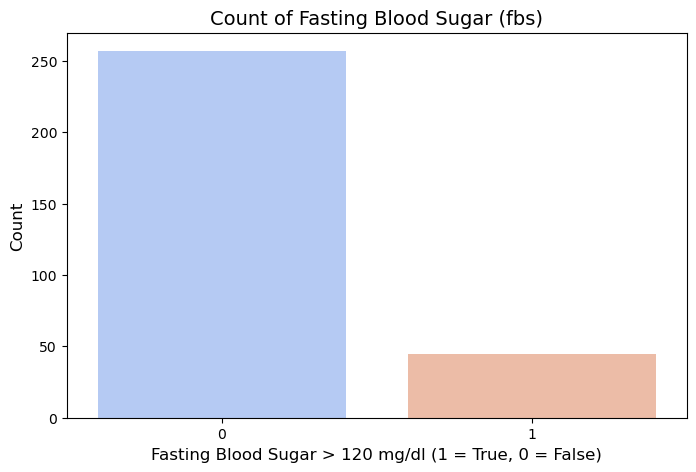

In [60]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['fbs'], palette='coolwarm')
plt.title('Count of Fasting Blood Sugar (fbs)', fontsize=14)
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# insight
The count plot for fbs shows that the majority of patients have fasting blood sugar ≤ 120 mg/dl (fbs = 0), indicating that elevated fasting blood sugar is less common in the dataset.

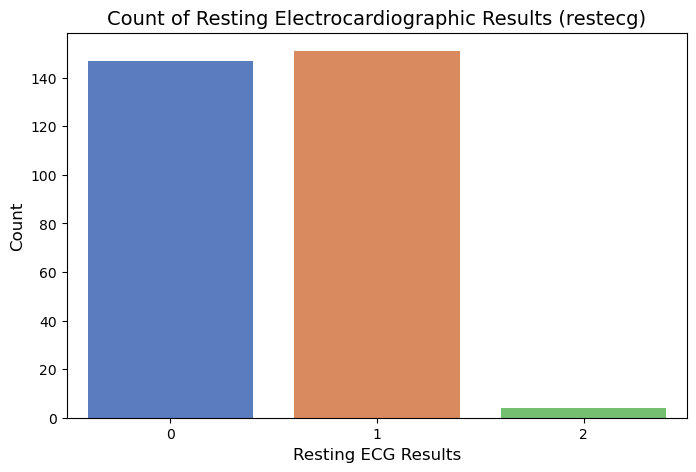

In [69]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['restecg'], palette='muted')
plt.title('Count of Resting Electrocardiographic Results (restecg)', fontsize=14)
plt.xlabel('Resting ECG Results', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# insigths
The count plot for restecg reveals that the most common resting ECG result is category 1, indicating that most patients show normal or near-normal findings.

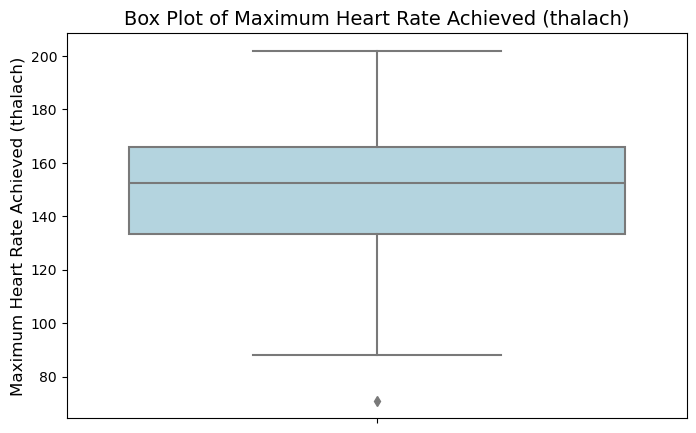

In [78]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['thalach'], color='lightblue')
plt.title('Box Plot of Maximum Heart Rate Achieved (thalach)', fontsize=14)
plt.ylabel('Maximum Heart Rate Achieved (thalach)', fontsize=12)
plt.show()

# insight
The box plot highlights the distribution of maximum heart rates achieved (thalach), indicating potential outliers and the central tendency of the data.

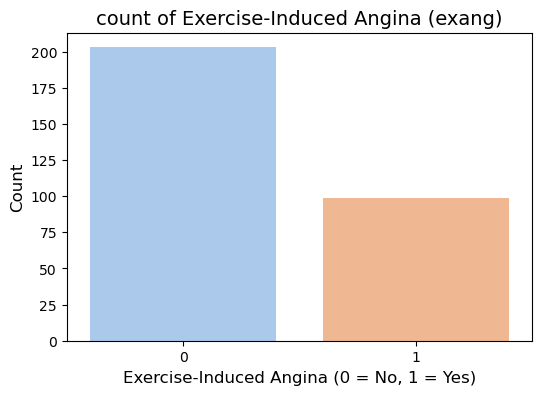

In [83]:
plt.figure(figsize=(6, 4))
sns.countplot(x='exang', data=data, palette='pastel')
plt.title('count of Exercise-Induced Angina (exang)', fontsize=14)
plt.xlabel('Exercise-Induced Angina (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# insight
This plot will show the count of instances for each category (0 or 1) in the exang column.

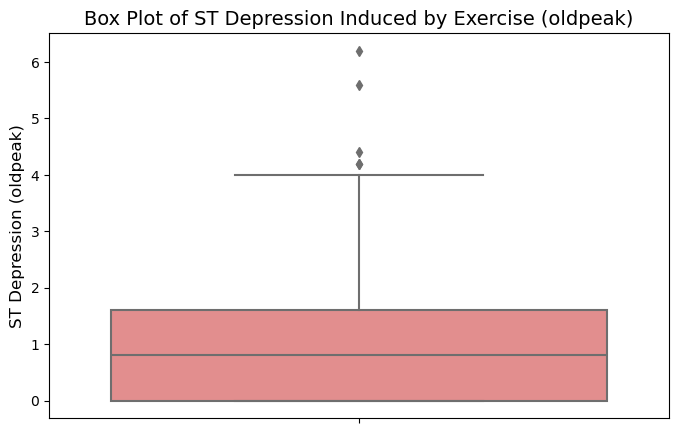

In [100]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['oldpeak'], color='lightcoral')
plt.title('Box Plot of ST Depression Induced by Exercise (oldpeak)', fontsize=14)
plt.ylabel('ST Depression (oldpeak)', fontsize=12)
plt.show()

# insight
The box plot shows the distribution of oldpeak values, highlighting the median, variability, and potential outliers.

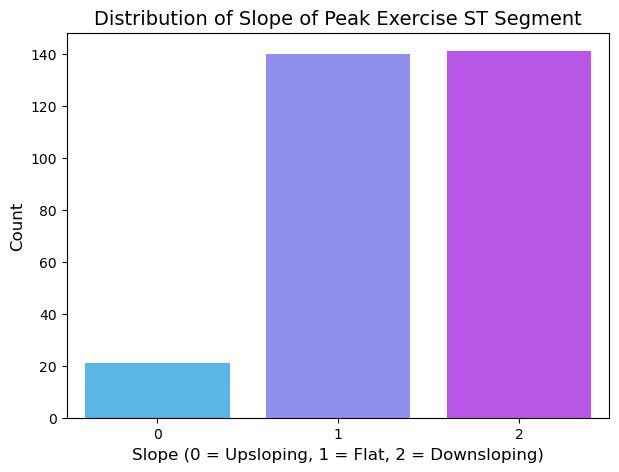

In [103]:
plt.figure(figsize=(7, 5))
sns.countplot(x='slope', data=data, palette='cool')
plt.title('Distribution of Slope of Peak Exercise ST Segment', fontsize=14)
plt.xlabel('Slope (0 = Upsloping, 1 = Flat, 2 = Downsloping)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


## Insights:
The bar plot highlights the frequency of each slope category, showing which type of slope (upsloping, flat, or downsloping) is most common in the dataset.

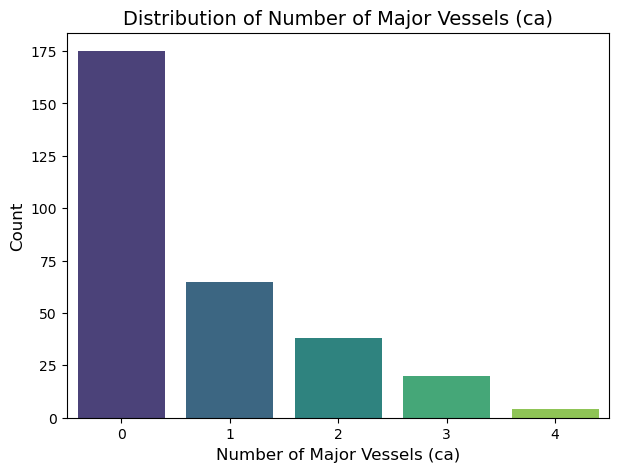

In [106]:
plt.figure(figsize=(7, 5))
sns.countplot(x='ca', data=data, palette='viridis')
plt.title('Distribution of Number of Major Vessels (ca)', fontsize=14)
plt.xlabel('Number of Major Vessels (ca)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# insight
The plot shows the distribution of the ca variable, indicating the frequency of different categories (number of major vessels colored by fluoroscopy) in the dataset. Let me know if you'd like further analysis! ​

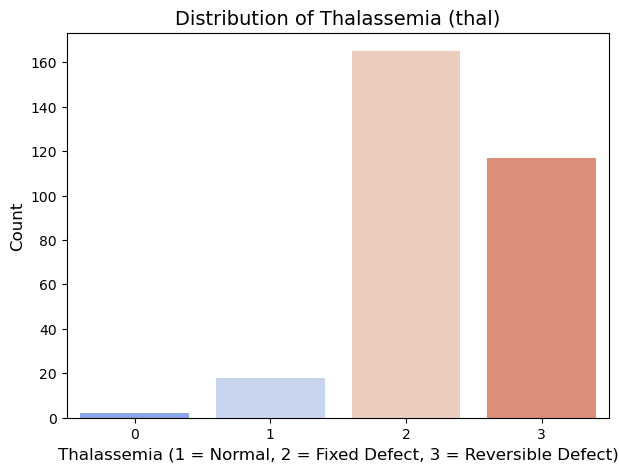

In [109]:
plt.figure(figsize=(7, 5))
sns.countplot(x='thal', data=data, palette='coolwarm')
plt.title('Distribution of Thalassemia (thal)', fontsize=14)
plt.xlabel('Thalassemia (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# insight
The plot shows the distribution of thal, indicating which type of thalassemia (normal, fixed defect, or reversible defect) is most common in the dataset.

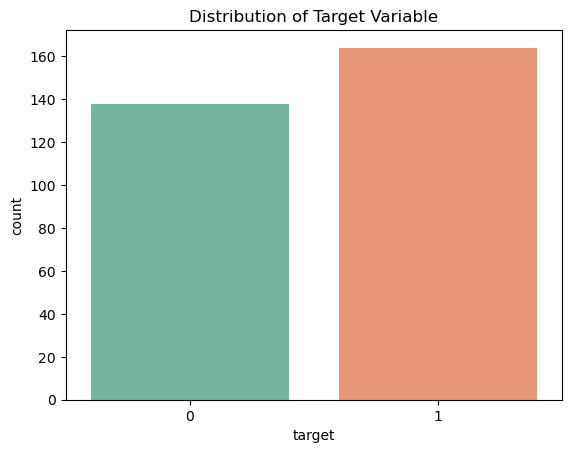

In [103]:
# Target Variable
sns.countplot(data=data,x="target", palette="Set2")
plt.title("Distribution of Target Variable")
plt.show()


# Insights:
Heart disease is slightly more common in this dataset, with 1 (Presence) being the majority class.

Suggests the need for a balanced approach in model-buildgin

# Bivariate Analysis

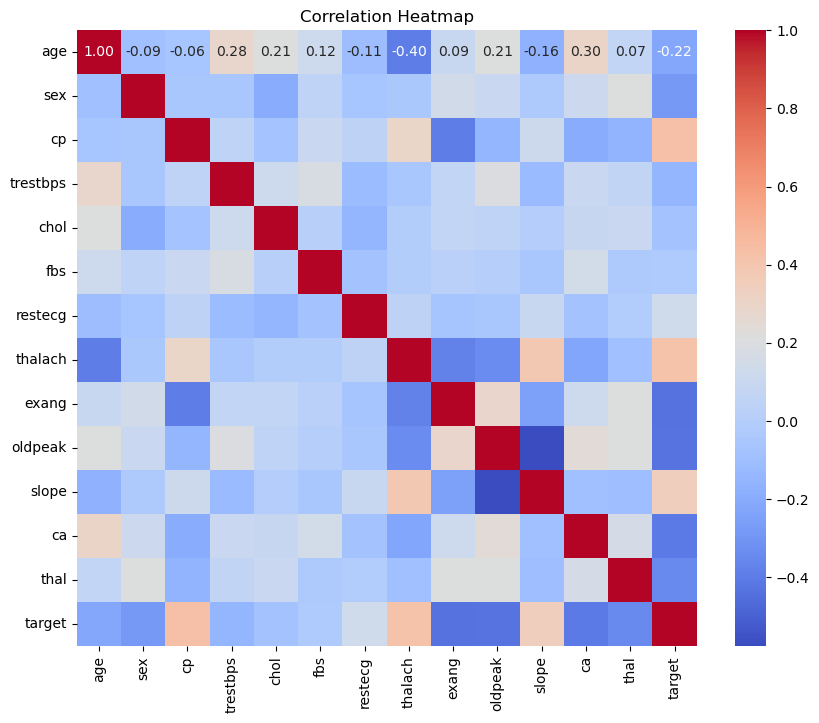

In [63]:

# Correlation heatmap
plt.figure(figsize=(10,8))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# insights

A correlation heatmap visually represents the strength and direction of relationships between variables. Darker colors indicate stronger correlations (red for positive, blue for negative), while lighter colors indicate weaker ones. It helps identify key relationships, unexpected correlations, and potential multicollinearity in your data.

In [71]:
# Box plots for categorical vs numerical
for col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=data,x=col,y=num_col,palette='Set3')
        plt.title(f"{num_col} by {col}")
        plt.xlabel(col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

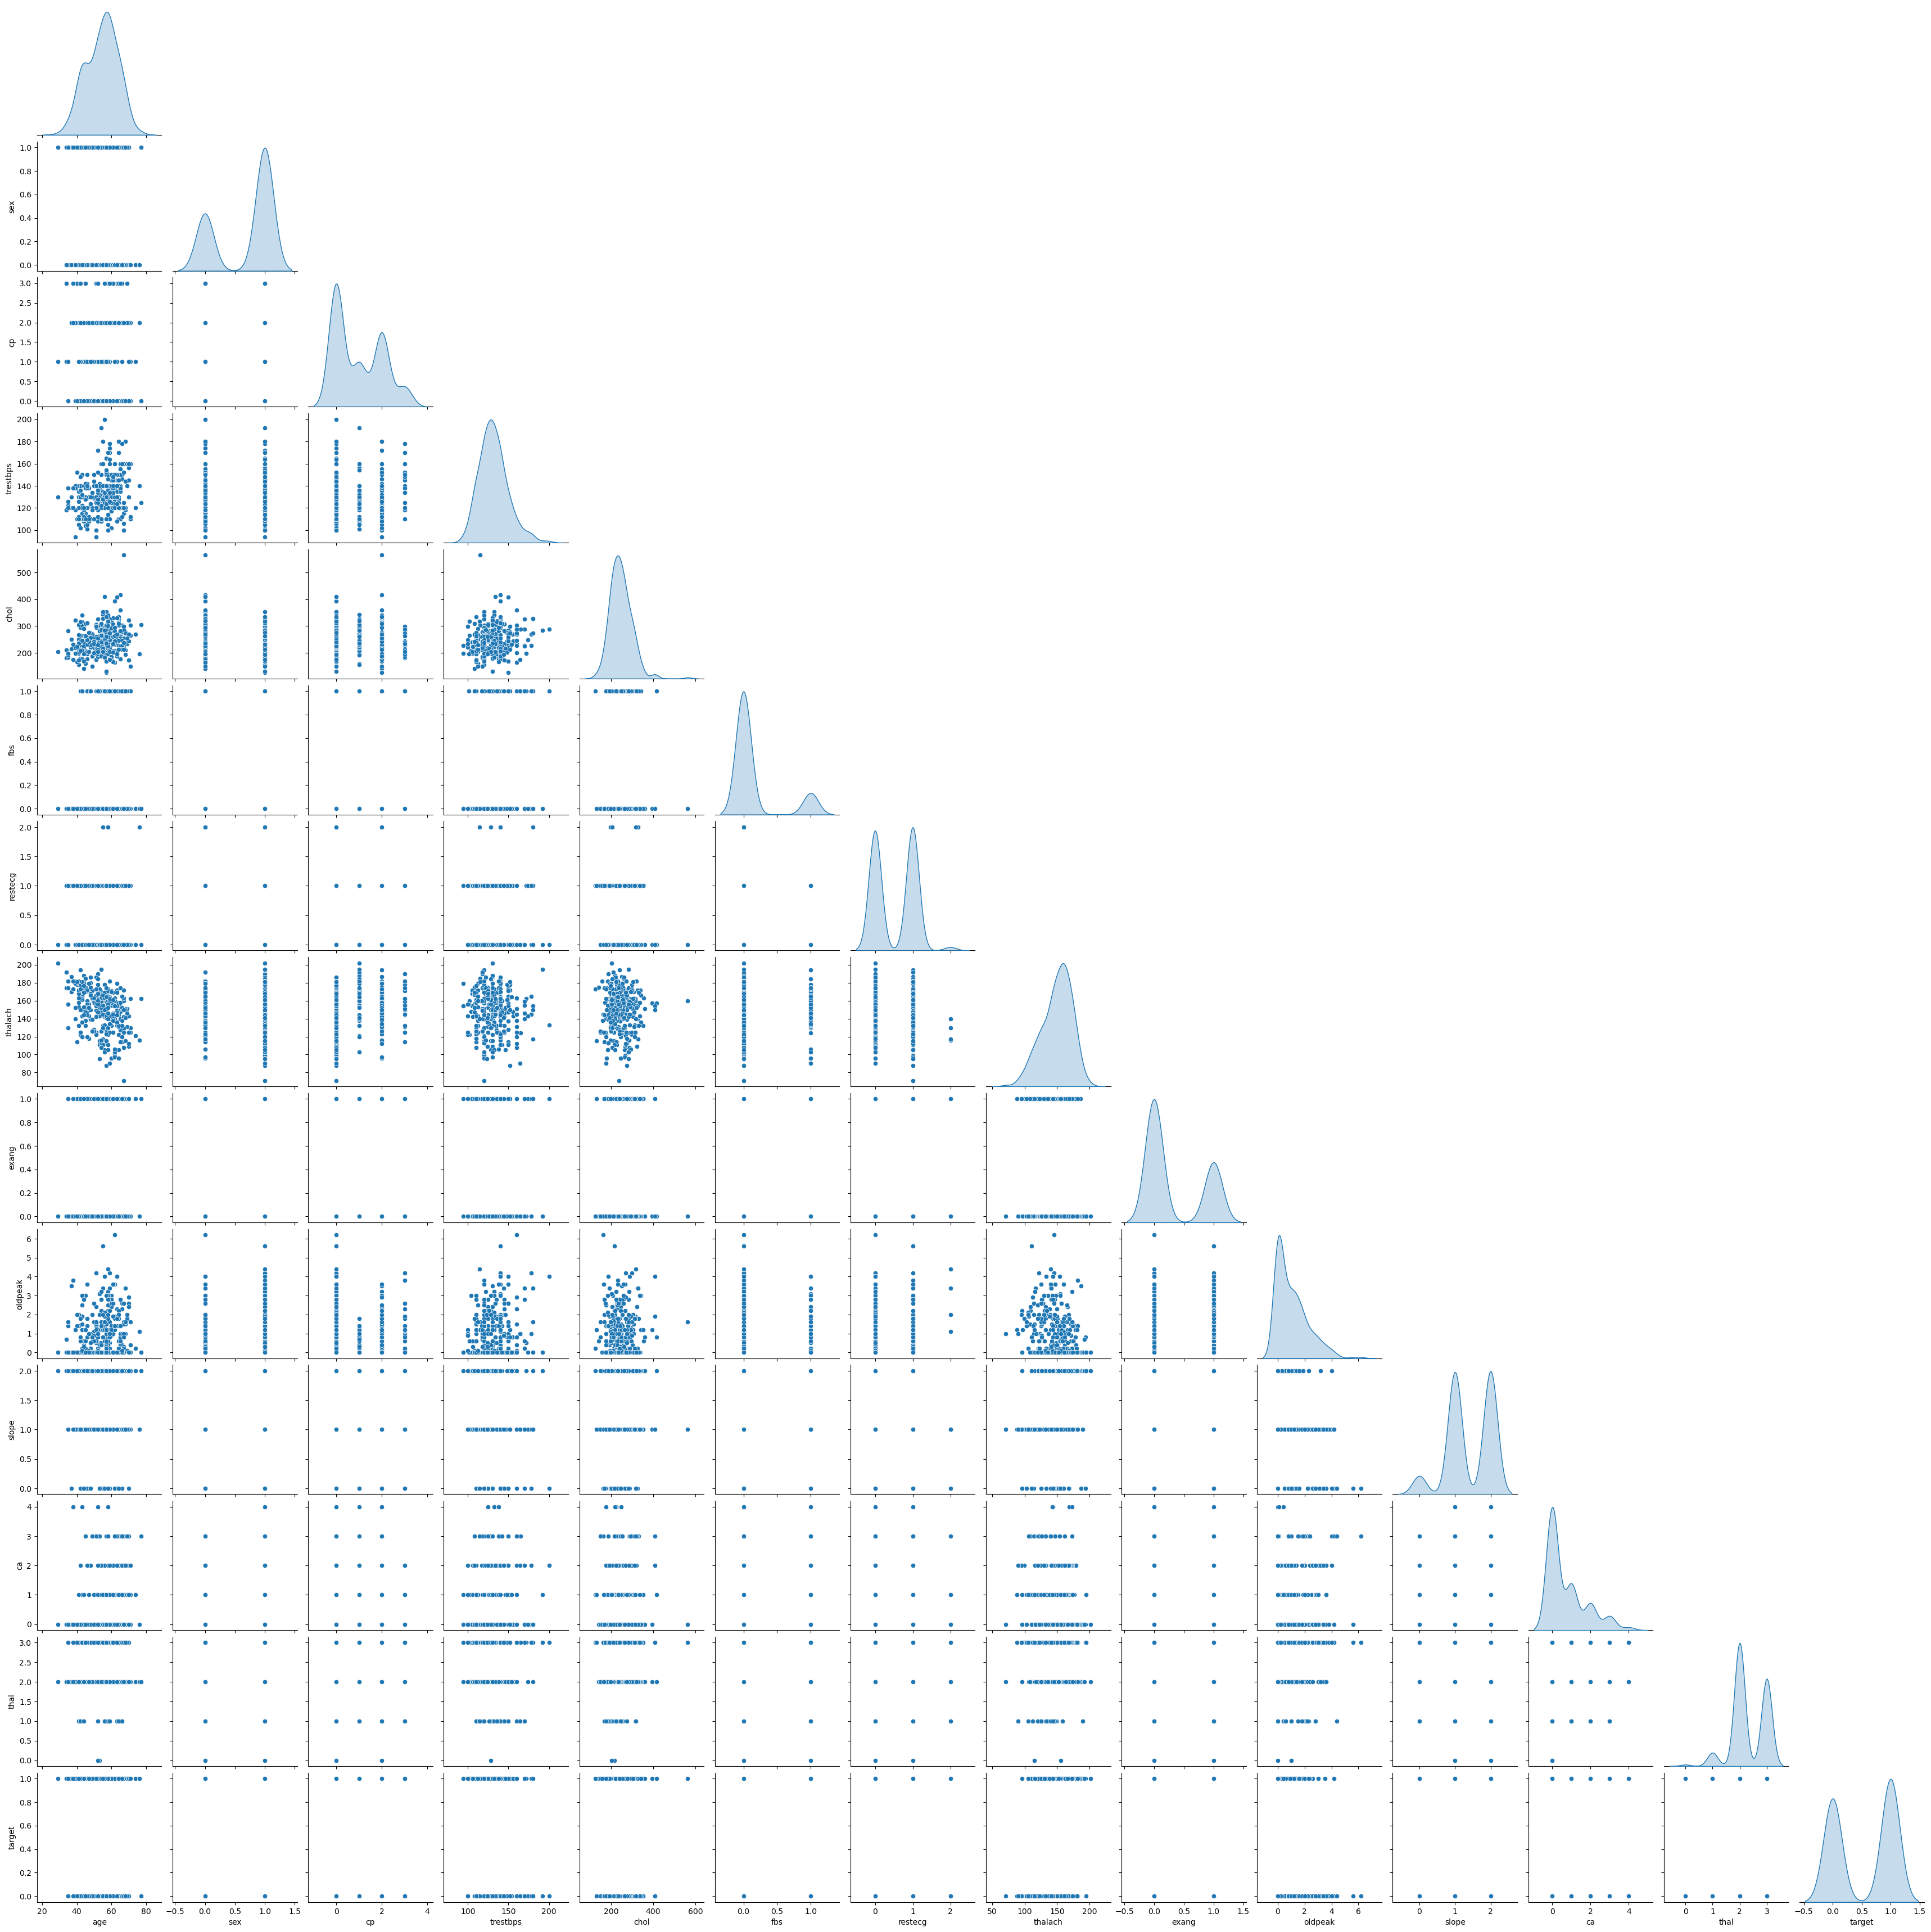

In [76]:
# Pairplot for numerical features
numerical_cols = data.select_dtypes(include=[np.number]).columns  # Identify numerical columns
sns.pairplot(data[numerical_cols], diag_kind='kde', corner=True)
plt.show()

# Insights

A pairplot shows distributions of individual variables (diagonals) and relationships between pairs of variables (off-diagonals). Diagonals reveal distribution shapes and spread; off-diagonals show correlations (linear/non-linear), clusters, and outliers. It's useful for visualizing relationships, identifying potential features, and spotting data issues.

# Multivariate analysis

<Figure size 800x600 with 0 Axes>

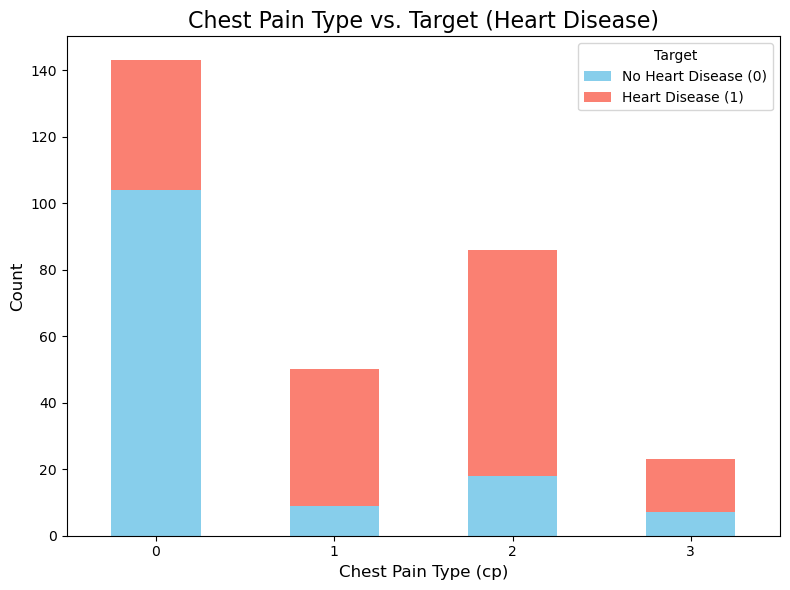

In [121]:
plt.figure(figsize=(8, 6))
cp_target = data.groupby(['cp', 'target']).size().unstack()
cp_target.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 6))

plt.title('Chest Pain Type vs. Target (Heart Disease)', fontsize=16)
plt.xlabel('Chest Pain Type (cp)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['No Heart Disease (0)', 'Heart Disease (1)'], title='Target', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# insight
The stacked bar plot shows how chest pain types (cp) are distributed across the presence or absence of heart disease, revealing a strong association between certain chest pain types and heart disease.

In [126]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [128]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss


In [130]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [132]:
fv=data.iloc[:,0:-1]
cv=data.iloc[:,-1]

In [134]:
fv

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [136]:
cv

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [138]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,stratify=cv)

In [140]:
x_train.shape

(241, 13)

In [142]:
std=StandardScaler()
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)

In [144]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3


In [146]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3


In [148]:
y_test.value_counts()

target
1    33
0    28
Name: count, dtype: int64

In [192]:
lor=LogisticRegression()

In [194]:
gs=GridSearchCV(estimator=lor,param_grid={"penalty":["l1","l2","elasticnet"],"C":[10**-3,10**-2,10**-1,10,10**2,10**3]},
                scoring="accuracy",cv=3,return_train_score=True,refit=True,verbose=3)

In [196]:
gs.fit(x_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END C=0.001, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=0.001, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=0.001, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=0.001, penalty=l2;, score=(train=0.706, test=0.704) total time=   0.0s
[CV 2/3] END C=0.001, penalty=l2;, score=(train=0.764, test=0.637) total time=   0.0s


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 3/3] END C=0.001, penalty=l2;, score=(train=0.720, test=0.713) total time=   0.0s
[CV 1/3] END C=0.001, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=0.001, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=0.001, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=0.01, penalty=l2;, score=(train=0.756, test=0.790) total time=   0.0s
[CV 2/3] END C=0.01, penalty=l2;, score=(train=0.789, test=0.688) total time=   0.0s
[CV 3/3] END C=0.01, penalty=l2;, score=(train=0.739, test=0.787) total time=   0.0s
[CV 1/3] END C=0.01, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=0.01, penalty=elasticnet;, score=(train=na

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 3/3] END C=0.01, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END .C=0.1, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END .C=0.1, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END .C=0.1, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=0.1, penalty=l2;, score=(train=0.894, test=0.852) total time=   0.0s
[CV 2/3] END C=0.1, penalty=l2;, score=(train=0.851, test=0.800) total time=   0.0s
[CV 3/3] END C=0.1, penalty=l2;, score=(train=0.845, test=0.850) total time=   0.0s
[CV 1/3] END C=0.1, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=0.1, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=0.1, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END ..C=10, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 2/3] END ..C=10, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END ..C=10, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=10, penalty=l2;, score=(train=0.919, test=0.840) total time=   0.0s
[CV 2/3] END C=10, penalty=l2;, score=(train=0.882, test=0.812) total time=   0.0s
[CV 3/3] END C=10, penalty=l2;, score=(train=0.863, test=0.850) total time=   0.0s
[CV 1/3] END C=10, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=10, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=10, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END .C=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END .C=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END .C=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=100, penalty=l2;, score=(train=0.912, test=0.827) total time=   0.0s


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 2/3] END C=100, penalty=l2;, score=(train=0.882, test=0.812) total time=   0.0s
[CV 3/3] END C=100, penalty=l2;, score=(train=0.870, test=0.838) total time=   0.0s
[CV 1/3] END C=100, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=100, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=100, penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=1000, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=1000, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=1000, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=1000, penalty=l2;, score=(train=0.919, test=0.840) total time=   0.0s
[CV 2/3] END C=1000, penalty=l2;, score=(train=0.882, test=0.825) total time=   0.0s
[CV 3/3] END C=1000, penalty=l2;, score=(train=0.857, test=0.838) total time=   0.0s
[CV 1/3] END C=1000, penalty=elasticnet;, score=(train=nan, test=nan) 

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [198]:
gs.best_params_

{'C': 10, 'penalty': 'l2'}

In [200]:
gs.best_estimator_

LogisticRegression(C=10)

In [204]:
y_pred =gs.best_estimator_ .predict(x_test)


In [208]:
accuracy_score(y_test, y_pred)

0.7377049180327869

In [210]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.61      0.68        28\n           1       0.72      0.85      0.78        33\n\n    accuracy                           0.74        61\n   macro avg       0.75      0.73      0.73        61\nweighted avg       0.74      0.74      0.73        61\n'

In [213]:
model.fit(x_train_std, y_train)

y_pp = model.predict_proba(x_test_std)

loss = log_loss(y_test, y_pp)

print(f"Log-Loss Score : {loss}")

Log-Loss Score : 0.3419543864878552
